### Sample Jupyter Notebook for testing/translating Script

In [3]:
import MetaTrader5 as mt5
import pandas as pd
import matplotlib.pyplot as plt

# Connect to MetaTrader 5 terminal

In [4]:
if not mt5.initialize():
    print("initialize() failed")
    mt5.shutdown()

# Define symbol, time frame and paramaters

In [5]:
symbol = "EURUSD"
timeframe = mt5.TIMEFRAME_H3  # Use H3 timeframe
ema_period = 34
fast_ema_period = 12
tunnel_period_1 = 144
tunnel_period_2 = 169
num_bars = 100  # Number of bars to retrieve

# Request historical data

In [6]:
utc_from = pd.Timestamp("2024-01-01 00:00:00").tz_localize('UTC')
utc_to = pd.Timestamp("2024-04-01 00:00:00").tz_localize('UTC')
rates = mt5.copy_rates_range(symbol, timeframe, utc_from, utc_to)

# Convert data to DataFrame

In [7]:
data = pd.DataFrame(rates)
data['time'] = pd.to_datetime(data['time'], unit='s')
data.set_index('time', inplace=True)

# Calculate EMAs manually

In [8]:
data['ema_12'] = data['close'].ewm(span=12, adjust=False).mean()
data['wavy_h'] = data['high'].ewm(span=34, adjust=False).mean()
data['wavy_c'] = data['close'].ewm(span=34, adjust=False).mean()
data['wavy_l'] = data['low'].ewm(span=34, adjust=False).mean()
data['tunnel1'] = data['close'].ewm(span=144, adjust=False).mean()
data['tunnel2'] = data['close'].ewm(span=169, adjust=False).mean()


# Plot EMAs

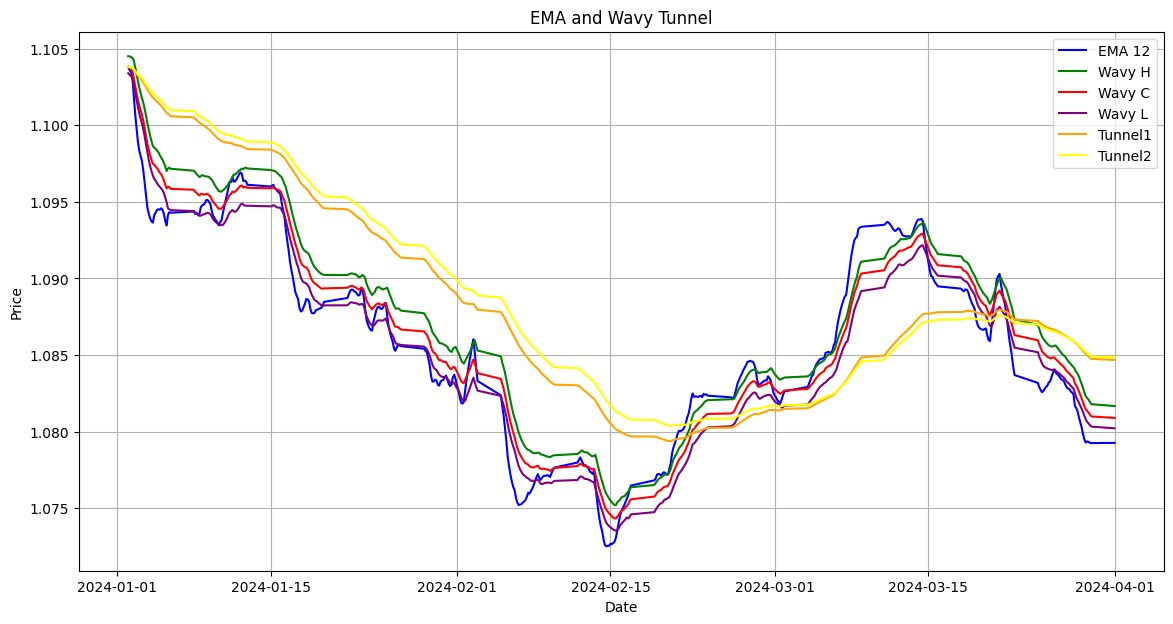

In [9]:
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['ema_12'], label='EMA 12', color='blue')
plt.plot(data.index, data['wavy_h'], label='Wavy H', color='green')
plt.plot(data.index, data['wavy_c'], label='Wavy C', color='red')
plt.plot(data.index, data['wavy_l'], label='Wavy L', color='purple')
plt.plot(data.index, data['tunnel1'], label='Tunnel1', color='orange')
plt.plot(data.index, data['tunnel2'], label='Tunnel2', color='yellow')
plt.legend()
plt.title('EMA and Wavy Tunnel')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid()
plt.show()


# Disconnect from MetaTrader 5 terminal

In [10]:
mt5.shutdown()

True